# sgram() -- pretty good looking spectrograms

Classic spectrograms in a python function call.

Using functions defined in the scipy.signal library and the matplotlib.pyplot library, sgram() produces a spectrogram plot from a wav audio file. It is optimized to produce speech spectrograms that closely resemble the 'classic' spectrograms produced by the Kay Elemetrics analog spectrograph.  In particular, two analysis bandwidths are predefined, and the spectrogram is calibrated to use 6" per second for chunks under 1.7 seconds long.  A spectral "slice" can also requested and printed after the spectrogram on the same frequency scale.

- filename -- name of a wav file to plot
- chan -- for dealing with stereo files, 0 (default) = left channel, 1 = right channel
- start, end -- times (in seconds) of the waveform chunk to plot -- default plot the whole file
- tf -- the top frequency to show in the spectrogram -- default is 8000Hz
- band -- 'wb' (default) wideband (300Hz effective filter bandwidth), 'nb' narrow band (45Hz filter)
- save_name -- name of a file to save figure with pyplot.savefig() -- default no name.
- slice_time -- location of an optional spectral slice.  -- default = -1 (no slice)
- cmap -- name of a matplotlib colormap for the spectrogram -- default = Greys

The function returns the frequency scale (frequency of each point in the spectrum), the time scale (time values of each spectrum), and the spectral amplitudes at those times and frequencies.

- f  -- a one dimensional array of frequency values (in Hz)
- ts -- a one dimensional array of time values (in seconds, should be one per millisecond)
- Sxx -- a two dimensional array of amplitude values (dB scaled)


In [1]:
import scipy.io.wavfile as wavfile
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from sgram import sgram

%matplotlib inline

## 1. The simplest call

Pass the name of a .wav file to sgram to see a spectrogram of the whole file.  This works best with small files (2 seconds or less).

Resampling from 48000 to 16000
f.shape = (4097,), ts.shape = (581,), Sxx.shape = (4097, 581)


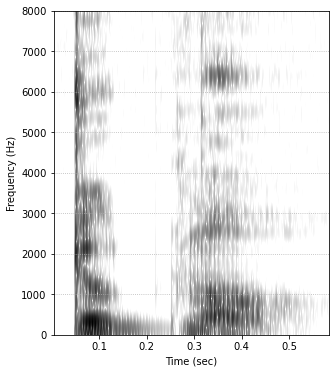

In [2]:
(f,ts,Sxx) = sgram('short_mono_example.wav') 
print(f'f.shape = {f.shape}, ts.shape = {ts.shape}, Sxx.shape = {Sxx.shape}')

## 2. Change the vertical scale, and save the figure to a file. 

- pyplot.savefig() can save in .png, .pdf, or .svg format

In [ ]:
(f,ts,Sxx) = sgram('short_mono_example.wav',tf=5000,save_name='example.png') 

## 3. Narrow band spectrogram, with a spectral slice

The spectrum of a particular location (slice_time) in the audio file, is shown as an extra panel on the right side of the spectrogram.  This example shows (1) a narrow-band spectrogtam of the same audio file used above, (2) the use of a matplotlib color map 'bwr' (blue, white, red), and (3) saving the figure as a PDF file.

In [ ]:
(f,ts,Sxx) = sgram('short_mono_example.wav', tf=5000,cmap='bwr',band='nb', 
                   slice_time=0.35, save_name="example2.pdf") 

## 4. Taking a small chunk out of a larger sound file.

Specify the start and end of the desired chunk in seconds.

In [ ]:
fname = 'long_mono_example.wav'
(f,ts,Sxx) = sgram(fname,cmap='Spectral_r', start=10.4, end=10.75) 

## 5. Seconds-per-inch stays constant

For relatively short segments (1.7 seconds or shorter) duration is indicated by the horizontal width of the figure. Note here that the stretch from 10.4 to 10.75 is the same as in the spectrogram above.  (In Jupyter notebooks

In [ ]:
(f,ts,Sxx) = sgram(fname,cmap='Spectral_r', start=10.4, end=11.6, save_name="example3.png") 

## 6. Spectrogram of a long file

The spectrogram of a longer file will be compressed into a single image, obscuring many details.

In [ ]:
(f,ts,Sxx) = sgram(fname,cmap='Spectral_r') 